# Understanding about the Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

In [3]:
boston = pd.read_csv('D:\COLLEGE FILES\DATACAMP\SupervisedLearning\HousingData.csv')

In [4]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [6]:
boston.shape 

(506, 14)

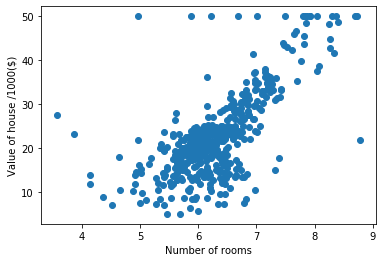

In [7]:
#Creating features and target variables.
X = boston.drop('MEDV',axis=1).values
y = boston['MEDV'].values
X_rooms = X[:,5]  #considering only the first five columns...

y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

#creating a scatter plot..
plt.scatter(X_rooms,y);   #plotting house values vs number of rooms..
#with the label on respective axis..
plt.ylabel('Value of house /1000($)')
plt.xlabel('Number of rooms')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(X_rooms,y)  #fitting the model using linear regression....(HouseValue vs Number of rows..)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

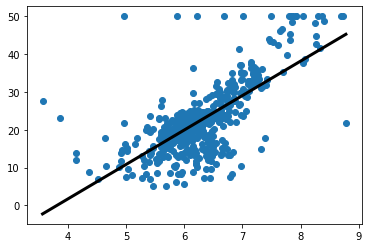

In [11]:
#After this we have to check the regression prediction...
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)  #ranging from min(rooms) - max(rooms)

plt.scatter(X_rooms,y)   #make a scatter plot..(blue dots..)
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)  #plotting the line..
plt.show()

In [12]:
#Now its time to work with the training and testing data set..


In [13]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
reg_all = LinearRegression()
reg_all.fit(X_rooms,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = reg_all.predict(X_rooms)

print("Root square(Score) value is : ",reg_all.score(X_rooms,y))  #calculating the Rsquare value..

rmse = np.sqrt(mean_squared_error(y,y_pred))

print("Root Mean Squared Error: {}".format(rmse))

Root square(Score) value is :  0.4835254559913343
Root Mean Squared Error: 6.603071389222561


In [16]:
#The above code is not working...don't know why..may be in future will get to know..(when using X and y)

In [17]:
#Understanding about the cross_validation..

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cv_results = cross_val_score(reg,X_rooms,y,cv=5) #(5 folds)  #used X_rooms instead of X...(was showing error..hence used X_rooms)

In [20]:
cv_results  #this will return the array of cross validation scores..(5 size..based on the value of cv)

array([ 0.70708692,  0.63476138,  0.50385441, -0.21594318, -1.77736913])

In [21]:
#we can also compute the mean of the cv_results..
np.mean(cv_results)

-0.029521919957810772

In [22]:
cv_results10 = cross_val_score(reg,X_rooms,y,cv=10)

In [23]:
print(cv_results10)

[ 0.56789192  0.80745302 -0.54477417  0.34693869  0.74372546  0.51130486
  0.75803107 -0.41345788 -5.13329341 -0.03202355]


In [24]:
print(np.mean(cv_results))

-0.029521919957810772


In [25]:
#Now understanding about the **Ridge Regression** in scikit learn

In [26]:
from sklearn.linear_model import Ridge

In [27]:
##A_train,A_test,b_train,b_test = train_test_split(A,b,test_size=0.3,random_state=42)

In [28]:
ridge = Ridge(alpha=0.1, normalize=True) #normalize=True ensures that all its variables are on the same scale..
ridge.fit(X_rooms,y)
ridge_pred = ridge.predict(X_rooms)
print("Score of this Ridge Regression is : ",ridge.score(X_rooms,y))

Score of this Ridge Regression is :  0.4795293778426454


In [29]:
#Now understanding about the **Lasso Regression** in scikit learn

In [30]:
from sklearn.linear_model import Lasso

In [31]:
lasso = Lasso(alpha=0.1,normalize=True)
lasso.fit(X_rooms,y)
lasso.pred = lasso.predict(X_rooms)
print("Score of the Lasso Regression is :",lasso.score(X_rooms,y)) 

Score of the Lasso Regression is : 0.4235867376375011


# How good is your model

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [36]:
knn = KNeighborsClassifier(n_neighbors=8)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
#now printing the confusion metrics..
print(confusion_matrix(y_test,y_pred))

#To compute the resulting matrix.
print(classification_report(y_test,y_pred))

#The above cells are not running...Don't know why..tried to do some thing but nothing happend..

# Now understanding about "Logistic Regression" and "ROC Curve"

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logreg = LogisticRegression()  #instantiate the classifier..

In [36]:
#split the data..
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state = 42)

In [ ]:
logreg.fit(X_train,y_train)  #fit the model on your training data.

In [ ]:
y_pred = logreg.predict(X_test)  #predict on your test set.

In [40]:
#we can also plot the ROC curve...

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg_predict_proba(X_test)[:,1]  #it returns the array of two columns(returns the 
#probability of respective target variables)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

In [38]:
#Area under the ROC curve...

In [39]:
from sklearn.metrics import roc_auc_score

# HyperParameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [42]:
knn = KNeighborsClassifier()

In [49]:
knn_cv = GridSearchCV(knn,param_grid,cv=5)

In [ ]:
knn_cv.fit(X,y)

In [ ]:
knn_cv.best_params_

In [ ]:
knn_cv.best_score_

# Dummy variables

In [43]:
boston_origin = pd.get_dummies(boston)  #we are trying to create the Dummy variables..

In [44]:
print(boston_origin.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [45]:
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [46]:
#Still not clear that what is the difference...(could not understand the topic of Dummy variables.)

# Understanding about the "MISSING DATA" 

In [47]:
#One way is that you can replace the missing data with some specific value..

In [48]:
print(boston.head())
boston.shape

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


(506, 14)

In [49]:
#like above you cans see that CHAS coloumn has all the values 0..So,

In [50]:
boston.CHAS.replace(0,np.nan,inplace=True)

In [51]:
print(boston.head()) #You can see below that CHAS coloumn has all NAN values..
boston.shape

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   NaN  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   NaN  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   NaN  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   NaN  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   NaN  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


(506, 14)

In [52]:
#The another method is to drop the row of NAN values..

In [53]:
boston = boston.dropna()  #this dropna() function will drop the values which is having NAN values..

In [54]:
print(boston.head())   #this dropna() funciton has removed the full row...as you can see below..

        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
142  3.32105  0.0  19.58   1.0  0.871  5.403  100.0  1.3216    5  403   
154  1.41385  0.0  19.58   1.0  0.871  6.129   96.0  1.7494    5  403   
160  1.27346  0.0  19.58   1.0  0.605  6.250   92.6  1.7984    5  403   
162  1.83377  0.0  19.58   1.0  0.605  7.802   98.2  2.0407    5  403   
208  0.13587  0.0  10.59   1.0  0.489  6.064   59.1  4.2392    4  277   

     PTRATIO       B  LSTAT  MEDV  
142     14.7  396.90  26.82  13.4  
154     14.7  321.02  15.12  17.0  
160     14.7  338.92   5.50  27.0  
162     14.7  389.61   1.92  50.0  
208     18.6  381.32  14.66  24.4  


In [55]:
#As you can see that we have lost most of our data..and this is not very good solution.....(unacceptable)

In [56]:
p = pd.read_csv('D:\COLLEGE FILES\DATACAMP\SupervisedLearning\HousingData.csv')

In [57]:
p.CHAS.replace(0,np.nan,inplace=True)

In [58]:
p.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,NaN,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,NaN,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,NaN,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,NaN,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [59]:
#Instead of removing the NaN values you can simply replace the NaN values by the mean of the inputed data..

In [60]:
from sklearn.preprocessing import Imputer

In [61]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)  

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [62]:
imp.fit(X)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [63]:
X = imp.transform(X)

In [64]:
#The above method us quite lengthy...So for that we will use Pipeline from scikit learn...

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

In [66]:
imp = Imputer(missing_values='NaN', strategy='mean',axis=0)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [67]:
logreg = LogisticRegression()

In [68]:
#We then build the Pipeline Object..

In [69]:
steps = [('imputation',imp),('logistic_regression',logreg)]

In [70]:
#then we pass the list to the Pipeline constructor..

In [71]:
pipeline = Pipeline(steps)

In [72]:
#Split the data into training and testing data set..

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
pipeline.fit(X_train,y_train)

In [ ]:
#then we predict with the test set...
y_pred = pipeline.predict(X_test)

In [99]:
#For good measure we compute accuracy

In [ ]:
pipeline.score(X_test,y_test)

# Normalize the DATA(Centering and Scaling)

In [1]:
from sklearn.preprocessing import scale

In [74]:
X_scaled = scale(X)

In [75]:
np.mean(X)

70.05863138298005

In [76]:
np.mean(X_scaled)

-1.3502256304349729e-16

In [77]:
np.std(X)

145.14344207604518

In [78]:
np.std(X_scaled)

1.0

In [79]:
#You can see the difference..

In [80]:
#We can also put scalar into Pipeline object..

In [81]:
from sklearn.preprocessing import StandardScalar

ImportError: cannot import name 'StandardScalar' from 'sklearn.preprocessing' (C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [ ]:
stpes = [('scalar',StandardScalar()),('knn',KNeighborsClassifier())]

In [ ]:
pipeline = Pipeline(stpes)

In [82]:
#split the data using train_test_split..

In [83]:
#fit the pipeline on the training set.

In [84]:
#then predict on the test set..

In [ ]:
accuracy_score(y_test,y_pred)